## Part II - Artificial Intelligence Basics: Regression

**Learning outcome**

- Learn and apply basic models for regression using sklearn and keras.
- Learn techniques to achieve better result.

Regression looks for relationships among variables. For example, you can observe several employees of some company and try to understand how their salaries depend on the features, such as experience, level of education, role, city they work in, and so on.

This is a regression problem where data related to each employee represent one observation. The presumption is that the experience, education, role, and city are the independent features, and the salary of the employee depends on them.

Similarly, you can try to establish a mathematical dependence of the prices of houses on their areas, numbers of bedrooms, distances to the city center, and so on.

Generally, in regression analysis, you usually consider some phenomenon of interest and have a number of observations. Each observation has two or more features. Following the assumption that (at least) one of the features depends on the others, you try to establish a relation among them.

The dependent features are called the dependent variables, outputs, or responses.

The independent features are called the independent variables, inputs, or predictors.

Regression problems usually have one continuous and unbounded dependent variable. The inputs, however, can be continuous, discrete, or even categorical data such as gender, nationality, brand, and so on.

It is a common practice to denote the outputs with 𝑦 and inputs with 𝑥. If there are two or more independent variables, they can be represented as the vector 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of inputs.

**When do you need regression?**
Typically, you need regression to answer whether and how some phenomenon influences the other or how several variables are related. For example, you can use it to determine if and to what extent the experience or gender impact salaries.

Regression is also useful when you want to forecast a response using a new set of predictors. For example, you could try to predict electricity consumption of a household for the next hour given the outdoor temperature, time of day, and number of residents in that household.

Regression is used in many different fields: economy, computer science, social sciences, and so on. Its importance rises every day with the availability of large amounts of data and increased awareness of the practical value of data.

An important to note is that regression does not imply causation. It is easy to find examples of non-related data that, after a regression calculation, do pass all sorts of statistical tests. The following is a popular example that illustrates the concept of data-driven “causality”.

![](./regression/regressionVCaus.png)

It is often said that correlation does not imply causation, although, inadvertently, we sometimes make the mistake of supposing that there is a causal link between two variables that follow a certain common pattern



**Dataset: "Alumni Giving Regression (Edited).csv"**

You can obtain the data set from this link:
```
https://www.dropbox.com/s/veak3ugc4wj9luz/Alumni%20Giving%20Regression%20%28Edited%29.csv?dl=0.
```

Also, you may run the following code in order to download the dataset in `google colab`: 

```
!wget https://www.dropbox.com/s/veak3ugc4wj9luz/Alumni%20Giving%20Regression%20%28Edited%29.csv?dl=0 -O 
--quiet  "./Alumni Giving Regression (Edited).csv"
 
```

```
!wget https://www.dropbox.com/s/veak3ugc4wj9luz/Alumni%20Giving%20Regression%20%28Edited%29.csv?dl=0 -O -quiet  "./Alumni Giving Regression (Edited).csv"
```

In [1]:
# Importing libraries needed
# Note that keras is generally used for deep learning as well
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import pandas as pd
import csv

Using TensorFlow backend.


In general, we will import dataset for structured dataset using pandas. We will also demostrate the code for loading dataset using numpy to show the differences between both libraries. Here, we are using a method in pandas call `read_csv` which takes the path of a csv file. `'CS'` in `CSV` represents comma separated. Thus, if you open up the file in excel, you would see values separated by commas.  

In [2]:
np.random.seed(7)
df = pd.read_csv("Alumni Giving Regression (Edited).csv", delimiter="," )
df.head()

,A,B,C,D,E,F
0,24,0.42,0.16,0.59,0.81,0.08
1,19,0.49,0.04,0.37,0.69,0.11
2,18,0.24,0.17,0.66,0.87,0.31
3,8,0.74,0.00,0.81,0.88,0.11
4,8,0.95,0.00,0.86,0.92,0.28


In pandas, it is very convenient to handle numerical data. Before doing any model, it is good to take a look at some of the dataset's statistics to get a 'feel' of the data.
Here, we can simple call df.describe which is a method in pandas `dataframe`

In [3]:
df.describe()

,A,B,C,D,E,F
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,17.772358,0.403659,0.136260,0.645203,0.841138,0.141789
std,4.517385,0.133897,0.060101,0.169794,0.083942,0.080674
min,6.000000,0.140000,0.000000,0.260000,0.580000,0.020000
25%,16.000000,0.320000,0.095000,0.505000,0.780000,0.080000
50%,18.000000,0.380000,0.130000,0.640000,0.840000,0.130000
75%,20.000000,0.460000,0.180000,0.785000,0.910000,0.170000
max,31.000000,0.950000,0.310000,0.960000,0.980000,0.410000


Furthermore, pandas provides a helpful method to calculate the pairwise correlation between 2 variable. What is correlation?

The term "correlation" refers to a mutual relationship or association between quantities (numerical number). In almost any business, it is very helping to express one quantity in terms of its relationship with others. We are concerned with this because businesses plans and departments are not isolated! For example, sales might increase when the marketing department spends more on advertisements, or a customer's average purchase amount on a online site may depends on his or her characteristics. Often, correlation is the first step to understanding these relationships and subsequently building better business and statistical models.

For example: 'D' and 'E' have a strong correlation of 0.93 which means that when D moves in the positive direction E is likely to move in that direction too. Here, notice that the correlation of `A` and `A` is 1. Of course, `A` would be perfectly correlated with `A`.

In [4]:
corr=df.corr(method ='pearson')
corr

,A,B,C,D,E,F
A,1.000000,-0.691900,0.414978,-0.604574,-0.521985,-0.549244
B,-0.691900,1.000000,-0.581516,0.487248,0.376735,0.540427
C,0.414978,-0.581516,1.000000,0.017023,0.055766,-0.175102
D,-0.604574,0.487248,0.017023,1.000000,0.934396,0.681660
E,-0.521985,0.376735,0.055766,0.934396,1.000000,0.647625
F,-0.549244,0.540427,-0.175102,0.681660,0.647625,1.000000


In general, we would need to test our model. `train_test_split` is a function in `Sklearn` model selection for splitting data arrays into two subsets for training data and
for testing data. With this function, you don't need to divide the dataset manually. You can use from the function `train_test_split` using the following code `sklearn.model_selection import train_test_split`. By default, Sklearn train_test_split will make random partitions for the two subsets. However, you can also specify a random state for the operation.

Here, take note that we will need to pass in the `X` and `Y` to the function. `X` refers to the `features` while `Y` refers to the `target` of the dataset.

In [5]:
Y_POSITION = 5
model_1_features = [i for i in range(0,Y_POSITION)]
X = df.iloc[:,model_1_features]
Y = df.iloc[:,Y_POSITION]
# create model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=2020)

### Linear regression

Linear regression is a basic predictive analytics technique that uses historical data to predict an output variable. It is popular for predictive modelling because it is easily understood and can be explained using plain English.

The basic idea is that if we can fit a linear regression model to observed data, we can then use the model to predict any future values. For example, let’s assume that we have found from historical data that the price (P) of a house is linearly dependent upon its size (S) — in fact, we found that a house’s price is exactly 90 times its size. The equation will look like this: `P = 90*S`

With this model, we can then predict the cost of any house. If we have a house that is 1,500 square feet, we can calculate its price to be: `P = 90*1500 = $135,000`

There are two kinds of variables in a linear regression model:

- The input or predictor variable is the variable(s) that help predict the value of the output variable. It is commonly referred to as X.
- The output variable is the variable that we want to predict. It is commonly referred to as Y.

To estimate Y using linear regression, we assume the equation:
Yₑ = α + β X
where Yₑ is the estimated or predicted value of Y based on our linear equation.
Our goal is to find statistically significant values of the parameters α and β that minimise the difference between Y and Yₑ.
If we are able to determine the optimum values of these two parameters, then we will have the line of best fit that we can use to predict the values of Y, given the value of X.
So, how do we estimate α and β? We can use a method called ordinary least squares.

The objective of the least squares method is to find values of α and β that minimise the sum of the squared difference between Y and Yₑ. We will not delve into the mathematics of least squares in our book.

Here, we notice that when `E` increases by 1, our `Y` increases by 0.175399. Also, when `C` increases by 1, our `Y` falls by 0.044160.
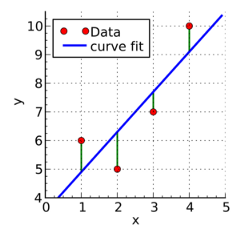

In [6]:
#Model 1 : linear regression

model1 = linear_model.LinearRegression()
model1.fit(X_train, y_train)
y_pred_train1 = model1.predict(X_train)
print("Regression")
print("================================")
RMSE_train1 = mean_squared_error(y_train,y_pred_train1)

print("Regression Train set: RMSE {}".format(RMSE_train1))
print("================================")
y_pred1 = model1.predict(X_test)
RMSE_test1 = mean_squared_error(y_test,y_pred1)
print("Regression Test set: RMSE {}".format(RMSE_test1))
print("================================")

coef_dict = {}
for coef, feat in zip(model1.coef_,model_1_features):
    coef_dict[df.columns[feat]] = coef
    
print(coef_dict)

Regression
Regression Train set: RMSE 0.0027616933222892287
Regression Test set: RMSE 0.0042098240263563754
{'A': -0.0009337757382417014, 'B': 0.16012156890162915, 'C': -0.04416001542534971, 'D': 0.15217907817100398, 'E': 0.17539950794101034}


### Decision Tree Regression

A decision tree is arriving at an estimate by asking a series of questions to the data, each question narrowing our possible values until the model get confident enough to make a single prediction. The order of the question as well as their content are being determined by the model. In addition, the questions asked  are all in a True/False form.

This is a little tough to grasp because it is not how humans naturally think, and perhaps the best way to show this difference is to create a real decision tree from. In the above problem x1, x2 are two features which allow us to make predictions for the target variable y by asking True/False questions.

![figure](./src/decision_tree_reg.png)


The decision of making strategic splits heavily affects a tree’s accuracy. The decision criteria is different for classification and regression trees.Decision trees regression normally use mean squared error (MSE) to decide to split a node in two or more sub-nodes. Suppose we are doing a binary tree the algorithm first will pick a value, and split the data into two subset. For each subset, it will calculate the MSE separately. The tree chooses the value with results in smallest MSE value.

Let's examine how is Splitting Decided for Decision Trees Regressor in more details. The first step to create a tree is to create the first binary decision. How are you going to do it?

1. We need to pick a variable and the value to split on such that the two groups are as different from each other as possible.
2. For each variable, for each possible value of the possible value of that variable see whether it is better.
3. Take weighted average of two new nodes (mse*num_samples)

To sum up, we now have:

- A single number that represents how good a split is which is the weighted average of the mean squared errors of the two groups that create.
- A way to find the best split which is to try every variable and to try every possible value of that variable and see which variable and which value gives us a split with the best score.

Training of a decision tree regressor will stop when some stopping condition is met:

1. When you hit a limit that was requested (for example: `max_depth`)
2. When your leaf nodes only have one thing in them (no further split is possible, MSE for the train will be zero but will overfit for any other set -not a useful model)
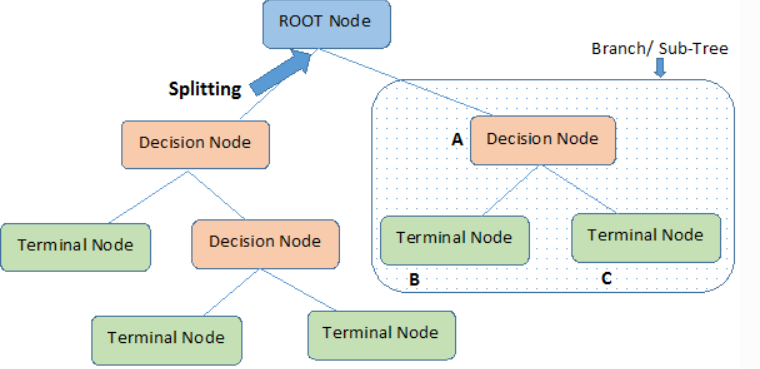

In [7]:
#Model 2 decision tree
model2 = tree.DecisionTreeRegressor()
model2.fit(X_train, y_train)
print("Decision Tree")
print("================================")
y_pred_train2 = model2.predict(X_train)
RMSE_train2 = mean_squared_error(y_train,y_pred_train2)
print("Decision Tree Train set: RMSE {}".format(RMSE_train2))
print("================================")
y_pred_test2 = model2.predict(X_test)
RMSE_test2 = mean_squared_error(y_test,y_pred_test2)
print("Decision Tree Test set: RMSE {}".format(RMSE_test2))
print("================================")

Decision Tree
Decision Tree Train set: RMSE 1.4739259778473743e-36
Decision Tree Test set: RMSE 0.008496


### Random Forests

What is a Random Forest? And how does it differ from a Decision Tree?

The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds. In data science speak, the reason that the random forest model works so well is: A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

The low correlation between models is the key. Just like how investments with low correlations (like stocks and bonds) come together to form a portfolio that is greater than the sum of its parts, uncorrelated models can produce ensemble predictions that are more accurate than any of the individual predictions. The reason for this wonderful effect is that the trees protect each other from their individual errors (as long as they don’t constantly all err in the same direction). While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction. So the prerequisites for random forest to perform well are:
1. There needs to be some actual signal in our features so that models built using those features do better than random guessing.
2. The predictions (and therefore the errors) made by the individual trees need to have low correlations with each other.

So how does random forest ensure that the behavior of each individual tree is not too correlated with the behavior of any of the other trees in the model? It uses the following two methods:
1. Bagging (Bootstrap Aggregation) — Decisions trees are very sensitive to the data they are trained on — small changes to the training set can result in significantly different tree structures. Random forest takes advantage of this by allowing each individual tree to randomly sample from the dataset with replacement, resulting in different trees. This process is known as bagging.

2. Feature Randomness — In a normal decision tree, when it is time to split a node, we consider every possible feature and pick the one that produces the most separation between the observations in the left node vs. those in the right node. In contrast, each tree in a random forest can pick only from a random subset of features. This forces even more variation amongst the trees in the model and ultimately results in lower correlation across trees and more diversification.

As Random Forest is actually a collection of Decision Trees, this makes the algorithm slower and less effective for real-time predictions. In general, Random Forest can be fast to train, but quite slow to create predictions once they are trained. this is due to the fact that it has to run predictions on each individual tree and then average their predictions to create the final prediction.

Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction Decision Trees do suffer from overfitting while Random Forest can prevent overfitting resulting in better prediction most of the time.

In [8]:
#Model 3 Random Forest
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)
print("Random Forest Regressor")
print("================================")
y_pred_train3 = model3.predict(X_train)
RMSE_train3 = mean_squared_error(y_train,y_pred_train3)
print("Random Forest Regressor TrainSet: RMSE {}".format(RMSE_train3))
print("================================")
y_pred_test3 = model3.predict(X_test)
RMSE_test3 = mean_squared_error(y_test,y_pred_test3)
print("Random Forest Regressor TestSet: RMSE {}".format(RMSE_test3))
print("================================")

Random Forest Regressor
Random Forest Regressor TrainSet: RMSE 0.0004964972448979589
Random Forest Regressor TestSet: RMSE 0.004843255999999997


### Neural network

Neural networks are the representation we make of the brain: neurons interconnected to other neurons which forms a network. A simple information transits in a lot of them before becoming an actual thing, like “move the hand to pick up this pencil”.

The operation of a complete neural network is straightforward : one enter variables as inputs (for example an image if the neural network is supposed to tell what is on an image), and after some calculations, an output is returned (probability of whether an image is a cat).

![figure](./src/neuralnet.png)

when an input is given to the neural network, it returns an output. On the first try, it can’t get the right output by its own (except with luck) and that is why, during the learning phase, every inputs come with its label, explaining what output the neural network should have guessed. If the choice is the good one, actual parameters are kept and the next input is given. However, if the obtained output doesn’t match the label, weights are changed. Those are the only variables that can be changed during the learning phase. This process may be imagined as multiple buttons, that are turned into different possibilities every times an input isn’t guessed correctly. To determine which weight is better to modify, a particular process, called “backpropagation” is done.

Below is the code to create a simple neural network in python:

```python model.add(Dense(64, input_dim=Y_position, activation='relu'))
```

The following code is telling python to add a layer of 64 neurons in to the neural network. We can stack the models by adding more layers of neuron. Or we can simply increase the numer of neuron. This can be thought of as to increase the number of 'neurons' in one's brain and thereby improving one's learning ability.

In [10]:
#Model 5: neural network
print("Neural Network")
print("================================")
model = Sequential()
model.add(Dense(64, input_dim=Y_POSITION, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
# Compile mode
# https://www.tensorflow.org/guide/keras/train_and_evaluate
model.compile(loss='MSE', optimizer='Adamax', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=300, batch_size=5, verbose=0)
# evaluate the model
predictions5 = model.predict(X_train)
RMSE_train5 = mean_squared_error(y_train,predictions5)
print("Neural Network TrainSet: RMSE {}".format(RMSE_train5))
print("==================================")
predictions5 = model.predict(X_test)
RMSE_test5 = mean_squared_error(y_test,predictions5)
print("Neural Network TestSet: RMSE {}".format(RMSE_test5))
print("================================")

Neural Network
Neural Network TrainSet: RMSE 0.02496122448979592
Neural Network TestSet: RMSE 0.032824


### How to improve our regression model

<div class="alert alert-block alert-warning">
    <b>Learning outcomes:</b>
    <br>
    <ul>
        <li>Learn how to use simple feature selection techniques to improve our model.</li>
        <li>Data cleaning to help improve our model's RMSE</li>
    </ul>
</div>

#### Boxplot

![figure](./src/Boxplot.png)

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It tells you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

Here is an image which shows normal distribution on a boxplot:

![figure](./src/boxplot_on_normal.png)


<br>As seen, a boxplot is a great way to visualise your dataset. Now, let's try to remove the outliers using our boxplot plot. This can be easily achieve with pandas dataframe. But do note that the dataset should be numerical to do this.

Code for boxplot:
``` python
boxplot = pd.DataFrame(dataset).boxplot()
```

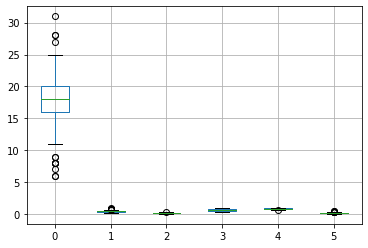

In [ ]:
import seaborn as sns
import pandas as pd
boxplot = pd.DataFrame(dataset).boxplot()

As shown in the plot, there are values in column 0 that are outliers which are values that are extremely large or small. This can skew our dataset. A concequence of having outliers in our dataset is that our model can't learn the right parameters. Thus, it results in a poorer prediction.

#### Remove outlier

The code removes outlier that is more than 99th percentile. Next, lets apply this on values lower than 1st percentile.

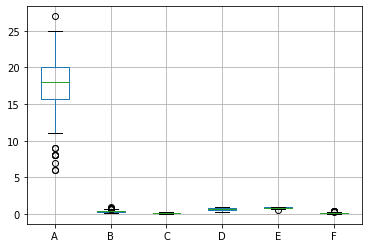

In [13]:
quantile99 = df.iloc[:,0].quantile(0.99)
df1 = df[df.iloc[:,0] < quantile99]
df1.boxplot()

Here, we have removed the outliers from the data successfully. 

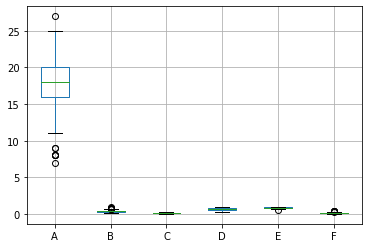

In [17]:
quantile1 = df.iloc[:,0].quantile(0.01)
quantile99 = df.iloc[:,0].quantile(0.99)
df2 = df[(df.iloc[:,0] > quantile1) & (df.iloc[:,0] < quantile99)]
df2.boxplot()

In [18]:
df2.shape

(118, 6)

#### Remove NA

To drop all the rows with the NaN values, you may use :
```python 
df.dropna()
```

In [23]:
df1 = df1.dropna()

### Feature importance

Apart from cleaning, we can apply use variables that we deem to be important to us. One way of doing so is via feature importance of random forest trees. 
In many use cases it is equally important to not only have an accurate, but also an interpretable model. Oftentimes, apart from wanting to know what our model’s house price prediction is, we also wonder why it is this high/low and which features are most important in determining the forecast. Another example might be predicting customer churn — it is very nice to have a model that is successfully predicting which customers are prone to churn, but identifying which variables are important can help us in early detection and maybe even improving the product/service.

Knowing feature importance indicated by machine learning models can benefit you in multiple ways, for example:
1. By getting a better understanding of the model’s logic you can not only verify it being correct but also work on improving the model by focusing only on the important variables
2. The above can be used for variable selection — you can remove x variables that are not that significant and have similar or better performance in much shorter training time 
3. In some business cases it makes sense to sacrifice some accuracy for the sake of interpretability. For example, when a bank rejects a loan application, it must also have a reasoning behind the decision, which can also be presented to the customer


We can obtain the feature importance using this code:
```python
importances = RF.feature_importances_
```
Then, we can sort the feature importance for ranking and indexing.

```python
indices = numpy.argsort(importances)[::-1]
```

In [19]:
import numpy
RF = model3
importances = RF.feature_importances_
std = numpy.std([tree.feature_importances_ for tree in RF.estimators_],axis=0)
indices = numpy.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature (Column index) %s (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature (Column index) 3 (0.346682)
2. feature (Column index) 1 (0.217437)
3. feature (Column index) 0 (0.174081)
4. feature (Column index) 4 (0.172636)
5. feature (Column index) 2 (0.089163)


Let's use the top 3 features and retrain another model. 
Here, we took a shorter time to train the model, yet the RMSE does not suffer due to fewer features.


In [21]:
indices_top3 = indices[:3]
print(indices_top3)
dataset=df
df = pd.DataFrame(df)

Y_position = 5
TOP_N_FEATURE = 3

X = dataset.iloc[:,indices_top3]
Y = dataset.iloc[:,Y_position]
# create model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=2020)
#Model 1 : linear regression


model1 = linear_model.LinearRegression()
model1.fit(X_train, y_train)
y_pred_train1 = model1.predict(X_train)
print("Regression")
print("================================")
RMSE_train1 = mean_squared_error(y_train,y_pred_train1)

print("Regression TrainSet: RMSE {}".format(RMSE_train1))
print("================================")
y_pred1 = model1.predict(X_test)
RMSE_test1 = mean_squared_error(y_test,y_pred1)
print("Regression Testset: RMSE {}".format(RMSE_test1))
print("================================")

[3 1 0]
Regression
Regression TrainSet: RMSE 0.0027952079052752685
Regression Testset: RMSE 0.004341758028139643


### Sample code

In [ ]:
import pandas as pd

df=pd.read_csv("C:/Users/User/Dropbox/TT Library/AI Model/Python/Treynor (Regression).csv")
print(df)

In [ ]:
df=df.dropna()
print(df)

In [ ]:
# Split X, Y

X=df.iloc[:,0:len(df.columns)-1]
Y=df.iloc[:,len(df.columns)-1]

print(X)
print(Y)

In [ ]:
#split train test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

model=linear_model.LinearRegression()
model.fit(X_train, Y_train)
pred=model.predict(X_train)
print(mean_squared_error(pred, Y_train))

pred=model.predict(X_test)
print(mean_squared_error(pred, Y_test))


In [ ]:
model= linear_model.Ridge()
model.fit(X_train, Y_train)
pred=model.predict(X_train)
print(mean_squared_error(pred, Y_train))

pred=model.predict(X_test)
print(mean_squared_error(pred, Y_test))


In [ ]:
model= linear_model.Lasso()
model.fit(X_train, Y_train)
pred=model.predict(X_train)
print(mean_squared_error(pred, Y_train))

pred=model.predict(X_test)
print(mean_squared_error(pred, Y_test))

In [ ]:
from sklearn import tree

model=tree.DecisionTreeRegressor()
model.fit(X_train, Y_train)
pred=model.predict(X_train)
print(mean_squared_error(pred, Y_train))

pred=model.predict(X_test)
print(mean_squared_error(pred, Y_test))
